In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
sys.path.append("/home/omalleyian/Documents/energy_market_project/scripts")
from ercot_data_interface import ercot_data_interface
from sklearn.neural_network import MLPRegressor

In [3]:
#x is your training series as a matrix
#t is your testing series as a matrix
ercot = ercot_data_interface(password="Is79t5Is79t5")
nodes_all = ercot.all_nodes
df_train = ercot.query_prices(nodes_all[4], "2011-01-01","2015-05-23")
df_test = ercot.query_prices(nodes_all[4], "2015-05-23","2016-05-23")
x = df_train.as_matrix().squeeze()
t = df_test.as_matrix().squeeze()

3.86342558282


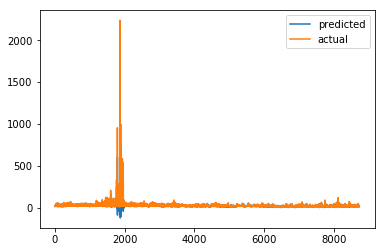

In [4]:
#Training
X = []
y = []
for i in np.arange(25, x.shape[0]):
    lags = []
    for k in np.arange(1, 25):
        lags.append(x[i-k])
    X.append(lags)
    y.append(x[i])
X = np.squeeze(np.array(X))
y = np.array(y)

#Change parameters to MLP
MLP = MLPRegressor(
    hidden_layer_sizes=(20,),
    alpha=.001,
    random_state=20,
    shuffle=False)

MLP.fit(X, y)

#Testing
X = []
y = []
for i in np.arange(25, t.shape[0]):
    lags = []
    for k in np.arange(1, 25):
        lags.append(t[i-k])
    X.append(lags)
    y.append(t[i])
X = np.squeeze(np.array(X))
y = np.array(y)

y_pred = MLP.predict(X)

print np.mean(np.abs(y_pred-y))
plt.plot(y_pred, label='predicted')
plt.plot(y, label='actual')
plt.legend()
plt.show()